# Exploring and Transforming JSON Schemas

# Introduction

In this lesson, you'll formalize how to explore a JSON file whose structure and schema is unknown to you. This often happens in practice when you are handed a file or stumble upon one with little documentation.

## Objectives
You will be able to:
* Explore unknown JSON schemas
* Access and manipulate data inside a JSON file
* Convert JSON to alternative data formats

## Loading the JSON file

Load the data from the file disease_data.json.

In [1]:
import json

f = open('disease_data.json')
data = json.load(f)

## Explore the first and second levels of the schema hierarchy

In [2]:
type(data)

dict

In [3]:
data.keys()

dict_keys(['meta', 'data'])

In [4]:
for key in data.keys():
    print(key, type(data[key]))

meta <class 'dict'>
data <class 'list'>


In [5]:
for key in data['meta'].keys():
    print(key, type(data['meta'][key]))

view <class 'dict'>


In [6]:
for key in data['meta']['view'].keys():
    print(key, type(data['meta']['view'][key]))

id <class 'str'>
name <class 'str'>
attribution <class 'str'>
attributionLink <class 'str'>
averageRating <class 'int'>
category <class 'str'>
createdAt <class 'int'>
description <class 'str'>
displayType <class 'str'>
downloadCount <class 'int'>
hideFromCatalog <class 'bool'>
hideFromDataJson <class 'bool'>
indexUpdatedAt <class 'int'>
licenseId <class 'str'>
newBackend <class 'bool'>
numberOfComments <class 'int'>
oid <class 'int'>
provenance <class 'str'>
publicationAppendEnabled <class 'bool'>
publicationDate <class 'int'>
publicationGroup <class 'int'>
publicationStage <class 'str'>
rowClass <class 'str'>
rowsUpdatedAt <class 'int'>
rowsUpdatedBy <class 'str'>
tableId <class 'int'>
totalTimesRated <class 'int'>
viewCount <class 'int'>
viewLastModified <class 'int'>
viewType <class 'str'>
columns <class 'list'>
grants <class 'list'>
license <class 'dict'>
metadata <class 'dict'>
owner <class 'dict'>
query <class 'dict'>
rights <class 'list'>
tableAuthor <class 'dict'>
tags <class '

In [7]:
colnames = []
for dictionary in data['meta']['view']['columns']:
    colnames.append(dictionary['name'])

colnames


['sid',
 'id',
 'position',
 'created_at',
 'created_meta',
 'updated_at',
 'updated_meta',
 'meta',
 'YearStart',
 'YearEnd',
 'LocationAbbr',
 'LocationDesc',
 'DataSource',
 'Topic',
 'Question',
 'Response',
 'DataValueUnit',
 'DataValueType',
 'DataValue',
 'DataValueAlt',
 'DataValueFootnoteSymbol',
 'DatavalueFootnote',
 'LowConfidenceLimit',
 'HighConfidenceLimit',
 'StratificationCategory1',
 'Stratification1',
 'StratificationCategory2',
 'Stratification2',
 'StratificationCategory3',
 'Stratification3',
 'GeoLocation',
 'ResponseID',
 'LocationID',
 'TopicID',
 'QuestionID',
 'DataValueTypeID',
 'StratificationCategoryID1',
 'StratificationID1',
 'StratificationCategoryID2',
 'StratificationID2',
 'StratificationCategoryID3',
 'StratificationID3']

In [8]:
data['data'][0]

[1,
 'FF49C41F-CE8D-46C4-9164-653B1227CF6F',
 1,
 1527194521,
 '959778',
 1527194521,
 '959778',
 None,
 '2016',
 '2016',
 'US',
 'United States',
 'BRFSS',
 'Alcohol',
 'Binge drinking prevalence among adults aged >= 18 years',
 None,
 '%',
 'Crude Prevalence',
 '16.9',
 '16.9',
 '*',
 '50 States + DC: US Median',
 '16',
 '18',
 'Overall',
 'Overall',
 None,
 None,
 None,
 None,
 [None, None, None, None, None],
 None,
 '59',
 'ALC',
 'ALC2_2',
 'CRDPREV',
 'OVERALL',
 'OVR',
 None,
 None,
 None,
 None]

In [9]:
len(data['data'])

60266

## Convert to a DataFrame

Create a DataFrame from the JSON file. Be sure to retrive the column names for the dataframe. (Search within the 'meta' key of the master dictionary.) The DataFrame should include all 42 columns.

In [10]:
import pandas as pd

In [11]:
df = pd.DataFrame(data['data'], columns=colnames)
df.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,YearStart,YearEnd,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
0,1,FF49C41F-CE8D-46C4-9164-653B1227CF6F,1,1527194521,959778,1527194521,959778,None,2016,2016,...,59,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
1,2,F4468C3D-340A-4CD2-84A3-DF554DFF065E,2,1527194521,959778,1527194521,959778,None,2016,2016,...,01,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
2,3,65609156-A343-4869-B03F-2BA62E96AC19,3,1527194521,959778,1527194521,959778,None,2016,2016,...,02,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
3,4,0DB09B00-EFEB-4AC0-9467-A7CBD2B57BF3,4,1527194521,959778,1527194521,959778,None,2016,2016,...,04,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None
4,5,D98DA5BA-6FD6-40F5-A9B1-ABD45E44967B,5,1527194521,959778,1527194521,959778,None,2016,2016,...,05,ALC,ALC2_2,CRDPREV,OVERALL,OVR,None,None,None,None


## Level-Up
## Create a bar graph of states with the highest asthma rates for adults age 18+

In [12]:
df['Topic'].unique()

array(['Alcohol', 'Arthritis', 'Asthma', 'Cancer', 'Diabetes',
       'Mental Health', 'Chronic Obstructive Pulmonary Disease',
       'Oral Health', 'Cardiovascular Disease', 'Immunization',
       'Chronic Kidney Disease',
       'Nutrition, Physical Activity, and Weight Status', 'Older Adults',
       'Tobacco', 'Overarching Conditions', 'Reproductive Health',
       'Disability'], dtype=object)

In [13]:
asthma = df[df['Topic'] == 'Asthma']
asthma.drop(['sid', 'id', 'position', 'created_at', 'created_meta', 'updated_at'], axis=1, inplace=True)
asthma.head()

/Users/jennykreiger/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


,updated_meta,meta,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
4725,959778,None,2016,2016,IL,Illinois,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,17,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5529,959778,None,2016,2016,IN,Indiana,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,18,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
5632,959778,None,2016,2016,IA,Iowa,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,19,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
6777,959778,None,2016,2016,KS,Kansas,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,20,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None
7034,959778,None,2016,2016,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,21,AST,AST1_1,CRDPREV,GENDER,GENM,None,None,None,None


In [14]:
asthma.Question.unique()

array(['Current asthma prevalence among adults aged >= 18 years',
       'Asthma prevalence among women aged 18-44 years',
       'Influenza vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Influenza vaccination among noninstitutionalized adults aged >= 65 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged 18-64 years with asthma',
       'Pneumococcal vaccination among noninstitutionalized adults aged >= 65 years with asthma'],
      dtype=object)

In [15]:
asthma = asthma[asthma['Question'] == 'Current asthma prevalence among adults aged >= 18 years']


In [16]:
asthma = asthma[asthma['StratificationCategoryID1'] == 'OVERALL']
asthma = asthma[asthma['DataValueTypeID'] == 'CRDPREV']

In [19]:
asthma[asthma['LocationAbbr'] == 'US']
# asthma.drop(index=9425, inplace=True)
asthma.drop(index=9370, inplace=True)

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
asthma['DataValue'] = [float(x) for x in asthma['DataValue']]

In [22]:
asthma = asthma.sort_values(by=['DataValue'], ascending=False)
top_10_asthma = asthma.iloc[:10, :]

In [23]:
top_10_asthma

,updated_meta,meta,YearStart,YearEnd,LocationAbbr,LocationDesc,DataSource,Topic,Question,Response,...,LocationID,TopicID,QuestionID,DataValueTypeID,StratificationCategoryID1,StratificationID1,StratificationCategoryID2,StratificationID2,StratificationCategoryID3,StratificationID3
9390,959778,None,2016,2016,ME,Maine,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,23,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9402,959778,None,2016,2016,NM,New Mexico,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,35,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9419,959778,None,2016,2016,WV,West Virginia,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,54,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9388,959778,None,2016,2016,KY,Kentucky,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,21,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9400,959778,None,2016,2016,NH,New Hampshire,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,33,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9413,959778,None,2016,2016,TN,Tennessee,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,47,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9393,959778,None,2016,2016,MI,Michigan,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,26,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9382,959778,None,2016,2016,HI,Hawaii,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,15,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9423,959778,None,2016,2016,PR,Puerto Rico,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,72,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None
9410,959778,None,2016,2016,RI,Rhode Island,BRFSS,Asthma,Current asthma prevalence among adults aged >=...,None,...,44,AST,AST1_1,CRDPREV,OVERALL,OVR,None,None,None,None


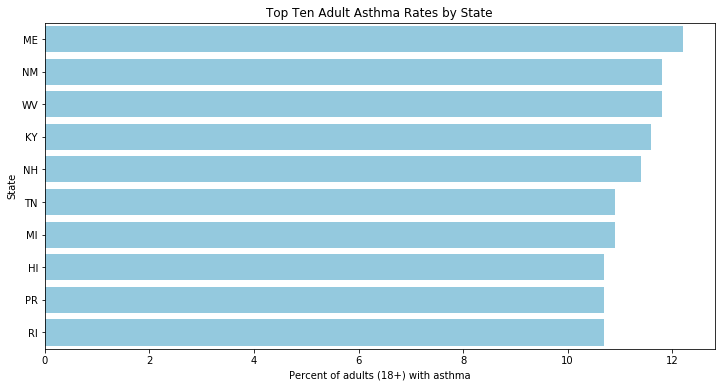

In [24]:
plt.figure(figsize=(12,6))
sns.barplot(x='DataValue', y='LocationAbbr', 
            data=top_10_asthma, orient='h', color='skyblue')
plt.xlabel('Percent of adults (18+) with asthma')
plt.ylabel('State')
plt.title('Top Ten Adult Asthma Rates by State')
plt.show();

## Level-Up!
## Create a function (or class) that returns an outline of the schema structure like this: 
<img src="images/outline.jpg" width="350">

Rules:
* Your outline should follow the numbering outline above (I, A, 1, a, i).
* Your outline should be properly indented! (Four spaces or one tab per indentation level.)
* Your function goes to at least a depth of 5 (Level-up: create a parameter so that the user can specify this)
* If an entry is a dictionary, list its keys as the subheadings
* After listing a key name (where applicable) include a space, a dash and the data type of the entry
* If an entry is a dict or list put in parentheses how many items are in the entry
* lists will not have key names for their entries (they're just indexed)
* For subheadings of a list, state their datatypes. 
* If a dictionary or list is more then 5 items long, only show the first 5 (we want to limit our previews); make an arbitrary order choice for dictionaries. (Level-up: Parallel to above; allow user to specify number of items to preview for large subheading collections.)

In [ ]:
# Your code here; you will probably want to define subfunctions.
def print_obj_outline(json_obj):
    return outline

In [ ]:
outline = print_obj_outline(data)

In [ ]:
print(outline) #Your function should produce the following output for this json object (and work for all json files!)

## Summary

Well done! In this lab you got some extended practice exploring the structure of JSON files and writing a recursive generalized function for outlining a JSON file's schema! 